In [ ]:
from evolvepro.src.process import generate_single_aa_mutants
from evolvepro.src.process import suggest_initial_mutants
# Generate single mutations 
generate_single_aa_mutants('data/evolution/raw/avGFP_WT.fasta', output_file="data/evolution/intermediate/GFP.fasta")
# Select mutants for initial testing
suggest_initial_mutants("data/evolution/intermediate/GFP.fasta", num_mutatns=12)

Number of mutants: 4523


In [5]:
# Embedding single mutantions with ESM 3B model
!python /home/ncku3/Programs/EvolvePro/evolvepro/plm/esm/extract.py esm2_t36_3B_UR50D data/evolution/intermediate/GFP.fasta data/evolution/intermediate/GFP_esm2_t36_3B_UR50D --toks_per_batch 512 --include mean --concatenate_dir data/evolution/intermediate

Transferred model to GPU
Read data/evolution/intermediate/GFP.fasta with 4523 sequences
Processing 1 of 2262 batches (2 sequences)
Device: cuda:0
Processing 2 of 2262 batches (2 sequences)
Device: cuda:0
Processing 3 of 2262 batches (2 sequences)
Device: cuda:0
Processing 4 of 2262 batches (2 sequences)
Device: cuda:0
Processing 5 of 2262 batches (2 sequences)
Device: cuda:0
Processing 6 of 2262 batches (2 sequences)
Device: cuda:0
Processing 7 of 2262 batches (2 sequences)
Device: cuda:0
Processing 8 of 2262 batches (2 sequences)
Device: cuda:0
Processing 9 of 2262 batches (2 sequences)
Device: cuda:0
Processing 10 of 2262 batches (2 sequences)
Device: cuda:0
Processing 11 of 2262 batches (2 sequences)
Device: cuda:0
Processing 12 of 2262 batches (2 sequences)
Device: cuda:0
Processing 13 of 2262 batches (2 sequences)
Device: cuda:0
Processing 14 of 2262 batches (2 sequences)
Device: cuda:0
Processing 15 of 2262 batches (2 sequences)
Device: cuda:0
Processing 16 of 2262 batches (2 seq

In [ ]:
# Generate initail mutations for evaluation
from evolvepro.src.process import suggest_initial_mutants
suggest_initial_mutants('data/evolution/intermediate/GFP.fasta', num_mutants=12)

In [9]:
# Extract sequences for brightness prediction and CG simulation
from Bio import SeqIO

records = SeqIO.parse("data/evolution/intermediate/GFP.fasta", "fasta")
mutants = []
for record in records:
    if record.id in ["A206S", "T63K", "K162W", "D234A", "V120D", "T9K", "L64K", "L42G", "V219E", "K41M", "K52V", "D21Y"]:
        mutants.append(record)
with open("data/evolution/results/GFP_init.fasta", "w") as f:
    SeqIO.write(mutants, f, "fasta")

In [2]:
from evolvepro.src.evolve import evolve_experimental

protein_name = 'avGFP'
embeddings_base_path = 'data/evolution/intermediate'
embeddings_file_name = 'GFP_esm2_t36_3B_UR50D.csv'
round_base_path = 'data/evolution/results'
wt_fasta_path = "data/evolution/raw/avGFP_WT.fasta"
number_of_variants = 12
output_dir = 'data/evolution/intermediate'
rename_WT = False

In [3]:
round_name = 'Round1'
round_file_names = ['Round1.xlsx']

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing avGFP - Round1
Embeddings loaded: (4523, 2560)
Loaded experimental data for Round1.xlsx: (12, 3)
iteration shape: (12, 2)
Labels shape: (4523, 5)
Embeddings and labels are aligned
(4511,)

Tested variants in this round: 12
696     V219E
741     V120D
796     D234A
1410    K162W
1437     K52V
1563      T9K
2070     T63K
2545     L64K
2555     K41M
2573     D21Y
2643    A206S
3168     L42G
Name: variant, dtype: object

Top 12 variants predicted by the model:
     variant    y_pred  y_actual  y_actual_scaled  y_actual_binary  \
3081    L53F  0.643869       NaN              NaN              NaN   
1656    M78F  0.641671       NaN              NaN              NaN   
1306     E6T  0.640531       NaN              NaN              NaN   
3492   L207W  0.638221       NaN              NaN              NaN   
3138   H148Q  0.637911       NaN              NaN              NaN   
1428    H25Q  0.636156       NaN              NaN              NaN   
209     R73M  0.635934       NaN      

/home/ncku3/Programs/EvolvePro/evolvepro/src/model.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


In [6]:

from Bio import SeqIO

records = SeqIO.parse("data/evolution/intermediate/GFP.fasta", "fasta")
mutants = []
for record in records:
    if record.id in ["I14K", "E32K", "I47S", "T59K", "L60K", "L60Q", "V68G", "D117A", "N135K", "N144T", "Y151A", "G191K", "K3D", "K3S", "G67K", "G67T", "Y151D", "Y151S", "N164E", "N164Q", "S208L", "E222K", "T230V", "E235L"]:
        mutants.append(record)
with open("data/evolution/results/GFP_Round2.fasta", "w") as f:
    SeqIO.write(mutants, f, "fasta")

In [6]:
round_name = 'Round2'
round_file_names = ['Round1.xlsx', 'Round2.xlsx']

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing avGFP - Round2
Embeddings loaded: (4523, 2560)
Loaded experimental data for Round1.xlsx: (12, 3)
Loaded experimental data for Round2.xlsx: (12, 3)
iteration shape: (24, 2)
Labels shape: (4523, 5)
Embeddings and labels are aligned
(4499,)

Tested variants in this round: 24
696     V219E
741     V120D
796     D234A
829     T230V
1057    E222K
1360    Y151D
1410    K162W
1437     K52V
1563      T9K
1698    N164Q
2070     T63K
2247     G67K
2297    S208L
2533    Y151S
2545     L64K
2555     K41M
2571      K3D
2573     D21Y
2643    A206S
2915    E235L
3168     L42G
3614    N164E
4179      K3S
4402     G67T
Name: variant, dtype: object

Top 12 variants predicted by the model:
     variant    y_pred  y_actual  y_actual_scaled  y_actual_binary  \
4066   G232F  0.643208       NaN              NaN              NaN   
1110    V11S  0.643042       NaN              NaN              NaN   
1608    T38E  0.642759       NaN              NaN              NaN   
4189    T38D  0.639355       N

/home/ncku3/Programs/EvolvePro/evolvepro/src/model.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


In [7]:
from Bio import SeqIO

records = SeqIO.parse("data/evolution/intermediate/GFP.fasta", "fasta")
mutants = []
for record in records:
    if record.id in ["E235Y", "S208Y", "E235F", "A206L", "S208F", "S86L", "K162L", "E235M", "A206I", "S86F", "A179Y", "A206V"]:
        mutants.append(record)
with open("data/evolution/results/GFP_Round3.fasta", "w") as f:
    SeqIO.write(mutants, f, "fasta")

In [ ]:
round_name = 'Round3'
round_file_names = ['Round1.xlsx', 'Round2.xlsx', 'Round3.xlsx']

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

In [8]:
from Bio import SeqIO

records = SeqIO.parse("data/evolution/intermediate/GFP.fasta", "fasta")
mutants = []
for record in records:
    if record.id in ["A206H", "A206T", "A206M", "A206F", "E235T", "A206R", "Y200V", "S208V", "A179L", "A179M", "A110M", "E235H"]:
        mutants.append(record)
with open("data/evolution/results/GFP_Round4.fasta", "w") as f:
    SeqIO.write(mutants, f, "fasta")

In [ ]:
round_name = 'Round4'
round_file_names = ['Round1.xlsx', 'Round2.xlsx', 'Round3.xlsx', 'Round4.xlsx']

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

In [9]:
from Bio import SeqIO

records = SeqIO.parse("data/evolution/intermediate/GFP.fasta", "fasta")
mutants = []
for record in records:
    if record.id in ["S208H", "A37Q", "A206K", "A87T", "A226S", "A206Q", "L207V", "E235S", "S202R", "E235A", "A179H", "E235G"]:
        mutants.append(record)
with open("data/evolution/results/GFP_Round5.fasta", "w") as f:
    SeqIO.write(mutants, f, "fasta")

In [ ]:
round_name = 'Round5'
round_file_names = ['Round1.xlsx', 'Round2.xlsx', 'Round3.xlsx', 'Round4.xlsx', "Round5.xlsx"]

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

In [10]:
from Bio import SeqIO

records = SeqIO.parse("data/evolution/intermediate/GFP.fasta", "fasta")
mutants = []
for record in records:
    if record.id in ["P211K", "G51I", "P211T", "L220V", "G51V", "T118D", "Y200K", "L220M", "P211S", "A87V", "D82Q", "A206C", "S205T", "M88Y"] :
        mutants.append(record)
with open("data/evolution/results/GFP_Round6.fasta", "w") as f:
    SeqIO.write(mutants, f, "fasta")

In [ ]:
round_name = 'Round6'
round_file_names = ['Round1.xlsx', 'Round2.xlsx', 'Round3.xlsx', 'Round4.xlsx', "Round5.xlsx", "Round6.xlsx"]

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

In [12]:
from Bio import SeqIO

records = SeqIO.parse("data/evolution/intermediate/GFP.fasta", "fasta")
mutants = []
for record in records:
    if record.id in ["R109K", "R215K", "M78F", "R73L", "Q80M", "P211D", "T38K", "H181K", "M78L", "R73K", "M88L", "V12F"]:
        mutants.append(record)
with open("data/evolution/results/GFP_Round7.fasta", "w") as f:
    SeqIO.write(mutants, f, "fasta")

In [ ]:
round_name = 'Round7'
round_file_names = ['Round1.xlsx', 'Round2.xlsx', 'Round3.xlsx', 'Round4.xlsx', "Round5.xlsx", "Round6.xlsx", "Round7.xlsx"]

this_round_variants, df_test, df_sorted_all = evolve_experimental(
    protein_name,
    round_name,
    embeddings_base_path,
    embeddings_file_name,
    round_base_path,
    round_file_names,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

In [13]:
# Generate combinations
from evolvepro.src.process import generate_n_mutant_combinations
generate_n_mutant_combinations('data/evolution/raw/avGFP_WT.fasta', mutant_file='data/evolution/results/mutants.xlsx', n=6, output_file='data/evolution/intermediate/GFP_comb6.fasta', threshold=0.657)
generate_n_mutant_combinations('data/evolution/raw/avGFP_WT.fasta', mutant_file='data/evolution/results/mutants.xlsx', n=5, output_file='data/evolution/intermediate/GFP_comb5.fasta', threshold=0.657)
generate_n_mutant_combinations('data/evolution/raw/avGFP_WT.fasta', mutant_file='data/evolution/results/mutants.xlsx', n=4, output_file='data/evolution/intermediate/GFP_comb4.fasta', threshold=0.657)
generate_n_mutant_combinations('data/evolution/raw/avGFP_WT.fasta', mutant_file='data/evolution/results/mutants.xlsx', n=3, output_file='data/evolution/intermediate/GFP_comb3.fasta', threshold=0.657)
generate_n_mutant_combinations('data/evolution/raw/avGFP_WT.fasta', mutant_file='data/evolution/results/mutants.xlsx', n=2, output_file='data/evolution/intermediate/GFP_comb2.fasta', threshold=0.657)

Number of mutant combinations: 924
Number of valid mutant combinations: 715
Number of mutant combinations: 792
Number of valid mutant combinations: 673
Number of mutant combinations: 495
Number of valid mutant combinations: 451
Number of mutant combinations: 220
Number of valid mutant combinations: 211
Number of mutant combinations: 66
Number of valid mutant combinations: 66


In [21]:
# Embed mutation combinations with ESM2 3B model again
!python /home/ncku3/Programs/EvolvePro/evolvepro/plm/esm/extract.py esm2_t36_3B_UR50D data/evolution/intermediate/GFP_comb6.fasta data/evolution/intermediate/GFP_comb6_esm2_t36_3B_UR50D --toks_per_batch 512 --include mean --concatenate_dir data/evolution/intermediate
!python /home/ncku3/Programs/EvolvePro/evolvepro/plm/esm/extract.py esm2_t36_3B_UR50D data/evolution/intermediate/GFP_comb5.fasta data/evolution/intermediate/GFP_comb5_esm2_t36_3B_UR50D --toks_per_batch 512 --include mean --concatenate_dir data/evolution/intermediate
!python /home/ncku3/Programs/EvolvePro/evolvepro/plm/esm/extract.py esm2_t36_3B_UR50D data/evolution/intermediate/GFP_comb4.fasta data/evolution/intermediate/GFP_comb4_esm2_t36_3B_UR50D --toks_per_batch 512 --include mean --concatenate_dir data/evolution/intermediate
!python /home/ncku3/Programs/EvolvePro/evolvepro/plm/esm/extract.py esm2_t36_3B_UR50D data/evolution/intermediate/GFP_comb3.fasta data/evolution/intermediate/GFP_comb3_esm2_t36_3B_UR50D --toks_per_batch 512 --include mean --concatenate_dir data/evolution/intermediate
!python /home/ncku3/Programs/EvolvePro/evolvepro/plm/esm/extract.py esm2_t36_3B_UR50D data/evolution/intermediate/GFP_comb2.fasta data/evolution/intermediate/GFP_comb2_esm2_t36_3B_UR50D --toks_per_batch 512 --include mean --concatenate_dir data/evolution/intermediate

Transferred model to GPU
Read data/evolution/intermediate/GFP_comb6.fasta with 715 sequences
Processing 1 of 358 batches (2 sequences)
Device: cuda:0
Processing 2 of 358 batches (2 sequences)
Device: cuda:0
Processing 3 of 358 batches (2 sequences)
Device: cuda:0
Processing 4 of 358 batches (2 sequences)
Device: cuda:0
Processing 5 of 358 batches (2 sequences)
Device: cuda:0
Processing 6 of 358 batches (2 sequences)
Device: cuda:0
Processing 7 of 358 batches (2 sequences)
Device: cuda:0
Processing 8 of 358 batches (2 sequences)
Device: cuda:0
Processing 9 of 358 batches (2 sequences)
Device: cuda:0
Processing 10 of 358 batches (2 sequences)
Device: cuda:0
Processing 11 of 358 batches (2 sequences)
Device: cuda:0
Processing 12 of 358 batches (2 sequences)
Device: cuda:0
Processing 13 of 358 batches (2 sequences)
Device: cuda:0
Processing 14 of 358 batches (2 sequences)
Device: cuda:0
Processing 15 of 358 batches (2 sequences)
Device: cuda:0
Processing 16 of 358 batches (2 sequences)
Dev

In [6]:
from evolvepro.src.evolve import evolve_experimental_multi
round_name = 'Round8'
round_file_names_single = ['Round1.xlsx', 'Round2.xlsx', 'Round3.xlsx', 'Round4.xlsx', 'Round5.xlsx', "Round6.xlsx", "Round7.xlsx"]
round_file_names_multi = []
rename_WT = True
embeddings_file_name_6n = 'GFP_comb6_esm2_t36_3B_UR50D.csv'
embeddings_file_name_5n = 'GFP_comb5_esm2_t36_3B_UR50D.csv'
embeddings_file_name_4n = 'GFP_comb4_esm2_t36_3B_UR50D.csv'
embeddings_file_name_3n = 'GFP_comb3_esm2_t36_3B_UR50D.csv'
embeddings_file_name_2n = 'GFP_comb2_esm2_t36_3B_UR50D.csv'
this_round_variants, df_test, df_sorted_all = evolve_experimental_multi(
    protein_name,
    round_name,
    embeddings_base_path,
    [embeddings_file_name, embeddings_file_name_6n, embeddings_file_name_5n, embeddings_file_name_4n, embeddings_file_name_3n, embeddings_file_name_2n],
    round_base_path,
    round_file_names_single,
    round_file_names_multi,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing avGFP - Round8
Embeddings loaded: (6634, 2560)
Loaded experimental data for Round1.xlsx: (12, 3)
Loaded experimental data for Round2.xlsx: (24, 3)
Loaded experimental data for Round3.xlsx: (12, 3)
Loaded experimental data for Round4.xlsx: (12, 3)
Loaded experimental data for Round5.xlsx: (12, 3)
Loaded experimental data for Round6.xlsx: (14, 3)
Loaded experimental data for Round7.xlsx: (12, 3)
Embeddings and labels are aligned
(6536,)

Tested variants in this round: 98
19       S86L
175     A206M
181     E235T
185     L220M
211     L207V
        ...  
4320     E32K
4353     I14K
4360    P211D
4398     T38K
4402     G67T
Name: variant, Length: 98, dtype: object

Top 12 variants predicted by the model:
                variant    y_pred
6579        P211S_S208F  0.638423
2641              P211Q  0.634472
6543  P211S_S208F_A206K  0.632035
2759              P211A  0.630495
4439              P211H  0.629333
503               P211Y  0.628734
6590        E235A_A206L  0.628672
6594   

/home/ncku3/Programs/EvolvePro/evolvepro/src/model.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


In [20]:

from Bio import SeqIO

records = SeqIO.parse("data/evolution/intermediate/GFP_comb4.fasta", "fasta")
mutants = []
for record in records:
    if record.id in ["S208L_T230V_A206H_L207V"]:
        mutants.append(record)
records2 = SeqIO.parse("data/evolution/intermediate/GFP_comb3.fasta", "fasta")
for r in records2:
    if r.id in ["A206S_S208L_T230V", "T230V_A206L_E235T", "S208L_T230V_A206L", "S208L_T230V_A206K", "S208L_T230V_A206H", "S208L_T230V_L207V"]:
        mutants.append(r)
records3 = SeqIO.parse("data/evolution/intermediate/GFP_comb2.fasta", "fasta")
for r in records3:
    if r.id in ["T230V_A226S", "S208L_E235A", "A206L_L207V"]:
        mutants.append(r)
records4 = SeqIO.parse("data/evolution/intermediate/GFP.fasta", "fasta")
for r in records4:
    if r.id in ["P211Q", "P211A"]:
        mutants.append(r)



with open("data/evolution/results/GFP_Round8.fasta", "w") as f:
    SeqIO.write(mutants, f, "fasta")

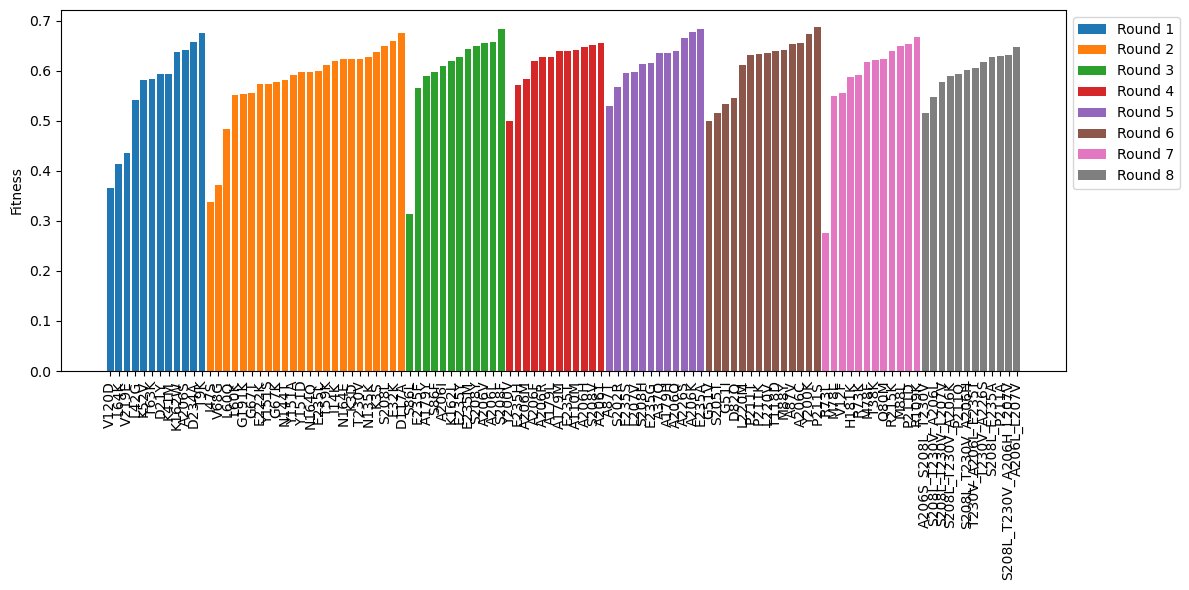

In [8]:
from evolvepro.src.plot import read_exp_data, plot_variants_by_iteration

round_base_path = 'data/evolution/results'
round_file_names_single = ['Round1.xlsx','Round2.xlsx','Round3.xlsx','Round4.xlsx','Round5.xlsx','Round6.xlsx','Round7.xlsx']
round_file_names_multi = ["Round8.xlsx"]
wt_fasta_path = "data/evolution/raw/avGFP_WT.fasta"

df = read_exp_data(round_base_path, round_file_names_single, wt_fasta_path, round_file_names_multi)
plot_variants_by_iteration(df, activity_column='activity', output_dir=output_dir, output_file="avGFP")

In [9]:
df_candidate = df[~df["variant"].isin(["K162L", "A226S", "L220M", "L220V"])].sort_values(by="activity", ascending=False)
df_candidate.head(30)

,Variant,activity,variant,iteration
72,211S,0.687125,P211S,6
60,235A,0.684460,E235A,5
36,208F,0.684354,S208F,3
61,206K,0.678189,A206K,5
24,117A,0.675759,D117A,2
0,9K,0.675488,T9K,1
73,200K,0.673847,Y200K,6
86,109K,0.666800,R109K,7
25,32K,0.658933,E32K,2
1,234A,0.657290,D234A,1


In [3]:

from evolvepro.src.evolve import evolve_experimental_multi
round_name = 'Round4'
round_file_names_single = ['Round1_v3.xlsx', 'Round2_v3.xlsx']
round_file_names_multi = ['Round3_v3.xlsx']
rename_WT = True
embeddings_file_name_6n = 'GFP_comb6_v2_esm2_t36_3B_UR50D.csv'
embeddings_file_name_5n = 'GFP_comb5_v2_esm2_t36_3B_UR50D.csv'
embeddings_file_name_4n = 'GFP_comb4_v2_esm2_t36_3B_UR50D.csv'
embeddings_file_name_3n = 'GFP_comb3_v2_esm2_t36_3B_UR50D.csv'
embeddings_file_name_2n = 'GFP_comb2_v2_esm2_t36_3B_UR50D.csv'
this_round_variants, df_test, df_sorted_all = evolve_experimental_multi(
    protein_name,
    round_name,
    embeddings_base_path,
    [embeddings_file_name, embeddings_file_name_6n, embeddings_file_name_5n, embeddings_file_name_4n, embeddings_file_name_3n, embeddings_file_name_2n],
    round_base_path,
    round_file_names_single,
    round_file_names_multi,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing avGFP_v3 - Round4
Embeddings loaded: (8208, 2560)
Loaded experimental data for Round1_v3.xlsx: (86, 3)
Loaded experimental data for Round2_v3.xlsx: (12, 3)
Loaded experimental data for Round3_v3.xlsx: (12, 2)
Embeddings and labels are aligned
(8098,)

Tested variants in this round: 110
19                   S86L
175                 A206M
181                 E235T
185                 L220M
211                 L207V
              ...        
8037    S208L_T230V_A206K
8043    S208L_T230V_A206H
8154          S208L_E235A
8158          A206L_L207V
8161          T230V_A226S
Name: variant, Length: 110, dtype: object

Top 12 variants predicted by the model:
                variant    y_pred
942               Q204H  0.629135
8193        A206H_L207V  0.626730
3634               S86D  0.626613
2962              L236K  0.626400
7787  S208L_A206K_L207V  0.625440
703                N23D  0.625043
4060              N185D  0.624438
1356               M88F  0.624054
8179        A206K_L207V  0.

/home/ncku3/Programs/EvolvePro/evolvepro/src/model.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


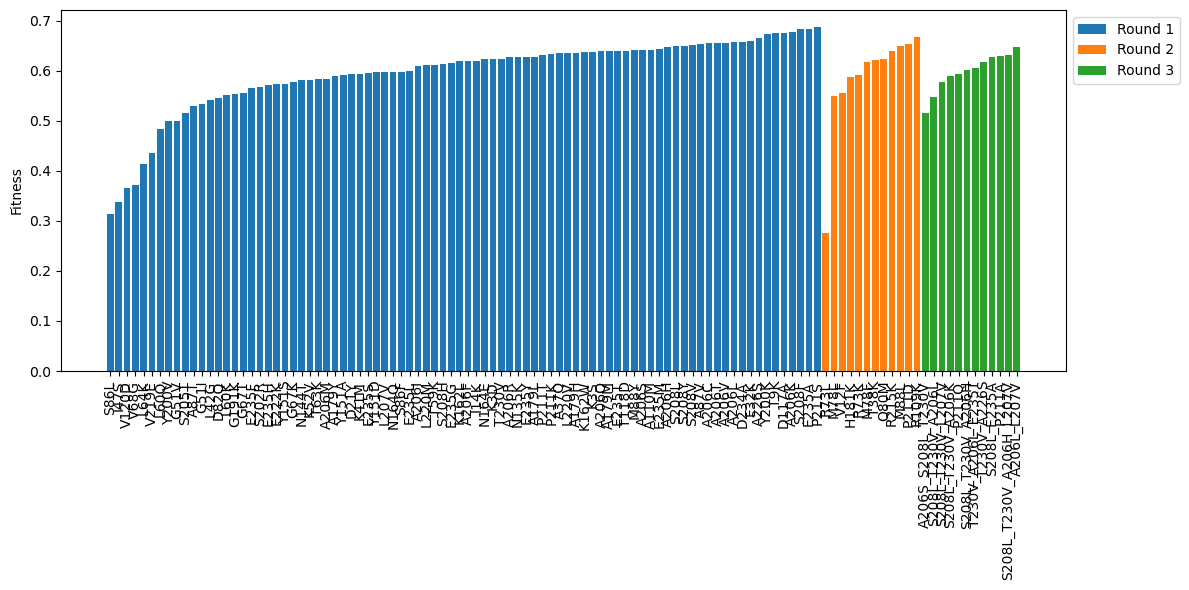

In [4]:

from evolvepro.src.plot import read_exp_data, plot_variants_by_iteration

round_base_path = 'data'
round_file_names_single = ['Round1_v3.xlsx', "Round2_v3.xlsx"]
round_file_names_multi = ["Round3_v3.xlsx"]
wt_fasta_path = "content/output/avGFP_WT.fasta"

df = read_exp_data(round_base_path, round_file_names_single, wt_fasta_path, round_file_names_multi)
plot_variants_by_iteration(df, activity_column='activity', output_dir=output_dir, output_file="avGFP_v3")

In [1]:
from evolvepro.src.process import generate_n_mutant_combinations
generate_n_mutant_combinations('content/output/avGFP_WT.fasta', mutant_file='data/Mutant_v3.xlsx', n=6, output_file='content/output/GFP_comb6_v2.1.fasta', threshold=0.48)
generate_n_mutant_combinations('content/output/avGFP_WT.fasta', mutant_file='data/Mutant_v3.xlsx', n=5, output_file='content/output/GFP_comb5_v2.1.fasta', threshold=0.48)
generate_n_mutant_combinations('content/output/avGFP_WT.fasta', mutant_file='data/Mutant_v3.xlsx', n=4, output_file='content/output/GFP_comb4_v2.1.fasta', threshold=0.48)
generate_n_mutant_combinations('content/output/avGFP_WT.fasta', mutant_file='data/Mutant_v3.xlsx', n=3, output_file='content/output/GFP_comb3_v2.1.fasta', threshold=0.48)
generate_n_mutant_combinations('content/output/avGFP_WT.fasta', mutant_file='data/Mutant_v3.xlsx', n=2, output_file='content/output/GFP_comb2_v2.1.fasta', threshold=0.48)


Number of mutant combinations: 54264
Number of valid mutant combinations: 11173
Number of mutant combinations: 20349
Number of valid mutant combinations: 7063
Number of mutant combinations: 5985
Number of valid mutant combinations: 3151
Number of mutant combinations: 1330
Number of valid mutant combinations: 961
Number of mutant combinations: 210
Number of valid mutant combinations: 189


In [ ]:

!python /home/ncku3/Programs/EvolvePro/evolvepro/plm/esm/extract.py esm2_t36_3B_UR50D content/output/GFP_comb6_v2.1.fasta content/output/GFP_comb6_v2.1_esm2_t36_3B_UR50D --toks_per_batch 256 --include mean --concatenate_dir content/output
!python /home/ncku3/Programs/EvolvePro/evolvepro/plm/esm/extract.py esm2_t36_3B_UR50D content/output/GFP_comb5_v2.1.fasta content/output/GFP_comb5_v2.1_esm2_t36_3B_UR50D --toks_per_batch 256 --include mean --concatenate_dir content/output
!python /home/ncku3/Programs/EvolvePro/evolvepro/plm/esm/extract.py esm2_t36_3B_UR50D content/output/GFP_comb4_v2.1.fasta content/output/GFP_comb4_v2.1_esm2_t36_3B_UR50D --toks_per_batch 256 --include mean --concatenate_dir content/output
!python /home/ncku3/Programs/EvolvePro/evolvepro/plm/esm/extract.py esm2_t36_3B_UR50D content/output/GFP_comb3_v2.1.fasta content/output/GFP_comb3_v2.1_esm2_t36_3B_UR50D --toks_per_batch 256 --include mean --concatenate_dir content/output
!python /home/ncku3/Programs/EvolvePro/evolvepro/plm/esm/extract.py esm2_t36_3B_UR50D content/output/GFP_comb2_v2.1.fasta content/output/GFP_comb2_v2.1_esm2_t36_3B_UR50D --toks_per_batch 256 --include mean --concatenate_dir content/output

Transferred model to GPU
Read content/output/GFP_comb6_v2.1.fasta with 11173 sequences
Processing 1 of 5587 batches (2 sequences)
Device: cuda:0
Processing 2 of 5587 batches (2 sequences)
Device: cuda:0
Processing 3 of 5587 batches (2 sequences)
Device: cuda:0
Processing 4 of 5587 batches (2 sequences)
Device: cuda:0
Processing 5 of 5587 batches (2 sequences)
Device: cuda:0
Processing 6 of 5587 batches (2 sequences)
Device: cuda:0
Processing 7 of 5587 batches (2 sequences)
Device: cuda:0
Processing 8 of 5587 batches (2 sequences)
Device: cuda:0
Processing 9 of 5587 batches (2 sequences)
Device: cuda:0
Processing 10 of 5587 batches (2 sequences)
Device: cuda:0
Processing 11 of 5587 batches (2 sequences)
Device: cuda:0
Processing 12 of 5587 batches (2 sequences)
Device: cuda:0
Processing 13 of 5587 batches (2 sequences)
Device: cuda:0
Processing 14 of 5587 batches (2 sequences)
Device: cuda:0
Processing 15 of 5587 batches (2 sequences)
Device: cuda:0
Processing 16 of 5587 batches (2 sequ

In [4]:



from evolvepro.src.evolve import evolve_experimental_multi
round_name = 'Round8'
round_file_names_single = ['Round1_v2.1.xlsx', 'Round2_v2.xlsx', 'Round3_v2.xlsx', 'Round4_v2.xlsx', 'Round5_v2.xlsx']
round_file_names_multi = ['Round6_v2.xlsx', 'Round7_v2.xlsx']
rename_WT = True
embeddings_file_name_6n = 'GFP_comb6_v2.1_esm2_t36_3B_UR50D.csv'
embeddings_file_name_5n = 'GFP_comb5_v2.1_esm2_t36_3B_UR50D.csv'
embeddings_file_name_4n = 'GFP_comb4_v2.1_esm2_t36_3B_UR50D.csv'
embeddings_file_name_3n = 'GFP_comb3_v2.1_esm2_t36_3B_UR50D.csv'
embeddings_file_name_2n = 'GFP_comb2_v2.1_esm2_t36_3B_UR50D.csv'
this_round_variants, df_test, df_sorted_all = evolve_experimental_multi(
    protein_name,
    round_name,
    embeddings_base_path,
    [embeddings_file_name, embeddings_file_name_6n, embeddings_file_name_5n, embeddings_file_name_4n, embeddings_file_name_3n, embeddings_file_name_2n],
    round_base_path,
    round_file_names_single,
    round_file_names_multi,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing avGFP - Round8


FileNotFoundError: [Errno 2] No such file or directory: 'data/evolution/intermediate/GFP_comb6_v2.1_esm2_t36_3B_UR50D.csv'

In [5]:

from Bio import SeqIO

records = SeqIO.parse("content/output/GFP_comb4_v2.1.fasta", "fasta")
mutants = []
for record in records:
    if record.id in ["A206S_S208L_T230V_L220M"]:
        mutants.append(record)
records2 = SeqIO.parse("content/output/GFP_comb3_v2.1.fasta", "fasta")
for r in records2:
    if r.id in ["S208L_A206K_L220V", "S208L_A206K_L207V"]:
        mutants.append(r)
records3 = SeqIO.parse("content/output/GFP_comb2_v2.1.fasta", "fasta")
for r in records3:
    if r.id in ["A206L_L207V", "T230V_A226S", "A206S_L220M", "A206L_L220V"]:
        mutants.append(r)
records4 = SeqIO.parse("content/output/GFP.fasta", "fasta")
for r in records4:
    if r.id in ["A87V", "D82Q", "A206C", "S205T", "M88Y"]:
        mutants.append(r)



with open("content/output/GFP_Round8_v2.fasta", "w") as f:
    SeqIO.write(mutants, f, "fasta")


In [3]:




from evolvepro.src.evolve import evolve_experimental_multi
round_name = 'Round9'
round_file_names_single = ['Round1_v2.1.xlsx', 'Round2_v2.xlsx', 'Round3_v2.xlsx', 'Round4_v2.xlsx', 'Round5_v2.xlsx']
round_file_names_multi = ['Round6_v2.xlsx', 'Round7_v2.xlsx', 'Round8_v2.xlsx']
rename_WT = True
embeddings_file_name_6n = 'GFP_comb6_v2.1_esm2_t36_3B_UR50D.csv'
embeddings_file_name_5n = 'GFP_comb5_v2.1_esm2_t36_3B_UR50D.csv'
embeddings_file_name_4n = 'GFP_comb4_v2.1_esm2_t36_3B_UR50D.csv'
embeddings_file_name_3n = 'GFP_comb3_v2.1_esm2_t36_3B_UR50D.csv'
embeddings_file_name_2n = 'GFP_comb2_v2.1_esm2_t36_3B_UR50D.csv'
this_round_variants, df_test, df_sorted_all = evolve_experimental_multi(
    protein_name,
    round_name,
    embeddings_base_path,
    [embeddings_file_name, embeddings_file_name_6n, embeddings_file_name_5n, embeddings_file_name_4n, embeddings_file_name_3n, embeddings_file_name_2n],
    round_base_path,
    round_file_names_single,
    round_file_names_multi,
    wt_fasta_path,
    rename_WT,
    number_of_variants,
    output_dir
)

Processing avGFP_v2 - Round9
Embeddings loaded: (27055, 2560)
Loaded experimental data for Round1_v2.1.xlsx: (12, 3)
Loaded experimental data for Round2_v2.xlsx: (12, 3)
Loaded experimental data for Round3_v2.xlsx: (12, 3)
Loaded experimental data for Round4_v2.xlsx: (12, 3)
Loaded experimental data for Round5_v2.xlsx: (12, 3)
Loaded experimental data for Round6_v2.xlsx: (12, 2)
Loaded experimental data for Round7_v2.xlsx: (12, 2)
Loaded experimental data for Round8_v2.xlsx: (12, 2)
Embeddings and labels are aligned
(26959,)

Tested variants in this round: 96
19              S86L
175            A206M
181            E235T
185            L220M
211            L207V
            ...     
26992    E235A_L207V
27016    A206K_L207V
27031    A206L_L220V
27033    A206H_L207V
27051     T63K_A206H
Name: variant, Length: 96, dtype: object

Top 12 variants predicted by the model:
                variant    y_pred
26954       A206L_L220M  0.474477
26154  T230V_A87T_L220M  0.474077
131               G

/home/ncku3/Programs/EvolvePro/evolvepro/src/model.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test])


In [12]:
df_candidate = df[~df["variant"].isin(["K162L", "A226S", "L220M", "L220V"])].sort_values(by="activity", ascending=False)
df_candidate.head(30)

,Variant,activity,variant,iteration
51,206K,0.502296,A206K,5
82,NaN,0.495423,T118D,7
9,206S,0.494240,A206S,1
86,NaN,0.494076,A206L_L207V,8
29,235M,0.493937,E235M,3
40,206H,0.493577,A206H,4
45,235T,0.487452,E235T,4
57,207V,0.487197,L207V,5
21,230V,0.486658,T230V,2
26,206L,0.486376,A206L,3
